In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('UCI_Credit_Card.txt',sep = ',')

In [3]:
data.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [4]:
data.tail(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


#### 数据集各变量定义
1. ID:客户 ID
2. LIMIT_BAL: 可透支金额
3. SEX: 性别，男：1，女：2
4. EDUCATION: 教育程度，研究生：1，本科：2，高中：3，其它：4
5. MARRIAGE: 婚姻状况，已婚：1，单身：2，其它：3
6. AGE: 年龄
7. PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6: 2005年9月、8月、7月、6月、5月、4月客户还款情况
8. BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6: 2005年9月、8月、7月、6月、5月、4月客户每月账单金额
9. PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6:2005年9月、8月、7月、6月、5月、4月客户每月还款金额
10. default.payment.next.month: 下月是否违约，违约：1，守约：0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

数据集中无缺失数据

In [6]:
data.duplicated().sum()

0

数据集中无重复数据

In [7]:
# 将分类变量转换为 category
features = ['SEX','EDUCATION','MARRIAGE','default.payment.next.month','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for feature in features:
    data.loc[:,feature] = data[feature].astype('category')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 no

In [9]:
data.describe(include = 'all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.0,30000.0,30000.0,30000.000000,30000.0,30000.0,30000.0,30000.0,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.0
unique,NaN,NaN,2.0,7.0,4.0,NaN,11.0,11.0,11.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,2.0,2.0,2.0,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,18112.0,14030.0,15964.0,NaN,14737.0,15730.0,15764.0,16455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23364.0
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,NaN,NaN,NaN,NaN,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,NaN
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,NaN,NaN,NaN,NaN,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,NaN
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,NaN
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,NaN
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,NaN
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,NaN


#### 数据可视化分析

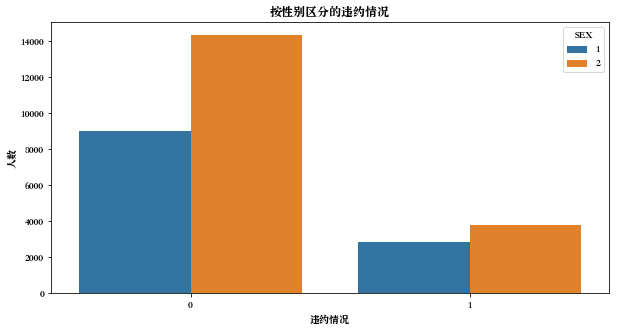

In [10]:
fig,ax = plt.subplots(figsize = (10,5))
sns.countplot(x = 'default.payment.next.month',hue = 'SEX', data=data,ax =ax)
ax.set_xlabel('违约情况')
ax.set_ylabel('人数')
ax.set_title('按性别区分的违约情况');

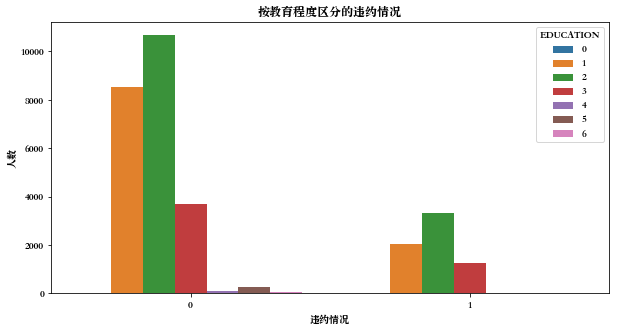

In [11]:
fig,ax = plt.subplots(figsize = (10,5))
sns.countplot(x = 'default.payment.next.month',hue = 'EDUCATION', data=data,ax =ax)
ax.set_xlabel('违约情况')
ax.set_ylabel('人数')
ax.set_title('按教育程度区分的违约情况');

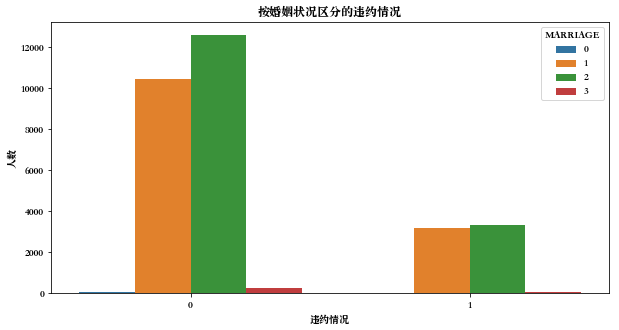

In [12]:
fig,ax = plt.subplots(figsize = (10,5))
sns.countplot(x = 'default.payment.next.month',hue = 'MARRIAGE', data=data,ax =ax)
ax.set_xlabel('违约情况')
ax.set_ylabel('人数')
ax.set_title('按婚姻状况区分的违约情况');

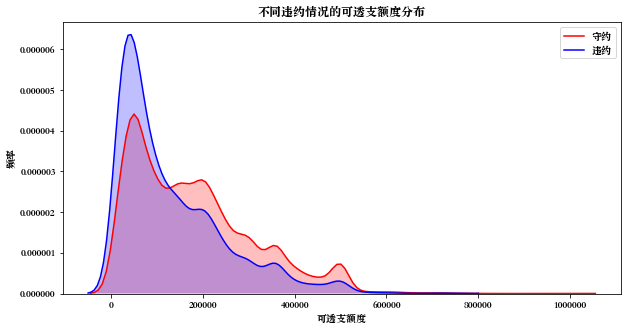

In [13]:
fig,ax  = plt.subplots(figsize = (10,5))
sns.distplot(data.loc[data['default.payment.next.month'] == 0,'LIMIT_BAL'],hist = False,color = 'r',kde_kws={"shade": True,"label":"守约"},ax =ax)
sns.distplot(data.loc[data['default.payment.next.month'] == 1,'LIMIT_BAL'],hist = False,color = 'b',kde_kws={"shade": True,"label": "违约"},ax =ax)
ax.set_title('不同违约情况的可透支额度分布')
ax.set_xlabel('可透支额度')
ax.set_ylabel('频率');

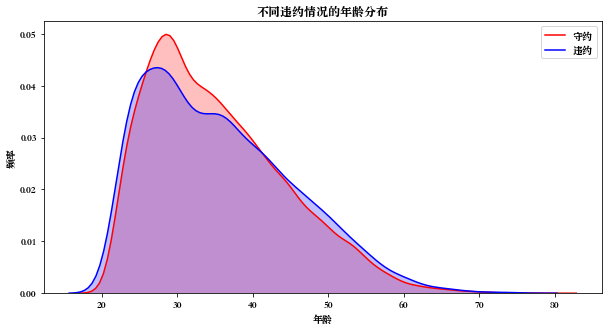

In [14]:
fig,ax  = plt.subplots(figsize = (10,5))
sns.distplot(data.loc[data['default.payment.next.month'] == 0,'AGE'],hist = False,color = 'r',kde_kws={"shade": True,"label":"守约"},ax =ax)
sns.distplot(data.loc[data['default.payment.next.month'] == 1,'AGE'],hist = False,color = 'b',kde_kws={"shade": True,"label": "违约"},ax =ax)
ax.set_title('不同违约情况的年龄分布')
ax.set_xlabel('年龄')
ax.set_ylabel('频率');

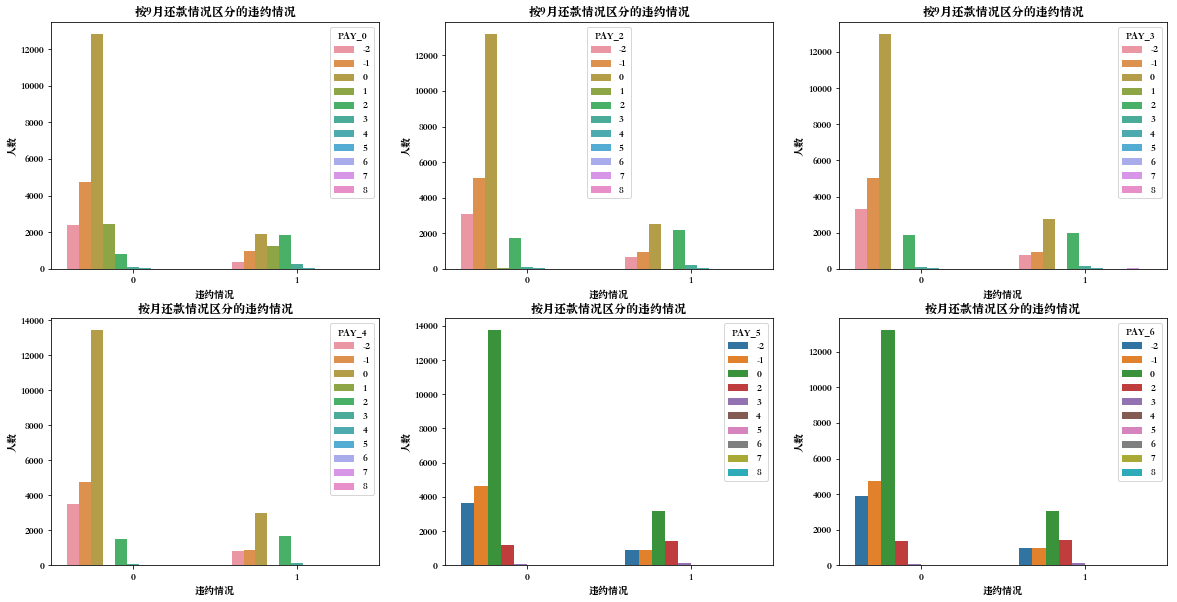

In [15]:
fig,ax = plt.subplots(2,3,figsize = (20,10))
for i, pay in enumerate(['PAY_0','PAY_2','PAY_3']): 
    sns.countplot(x = 'default.payment.next.month',hue = pay, data=data,ax =ax[0][i])
    ax[0][i].set_xlabel('违约情况')
    ax[0][i].set_ylabel('人数')
    ax[0][i].set_title('按9月还款情况区分的违约情况');
for i, pay in enumerate(['PAY_4','PAY_5','PAY_6']): 
    sns.countplot(x = 'default.payment.next.month',hue = pay, data=data,ax =ax[1][i])
    ax[1][i].set_xlabel('违约情况')
    ax[1][i].set_ylabel('人数')
    ax[1][i].set_title('按月还款情况区分的违约情况');

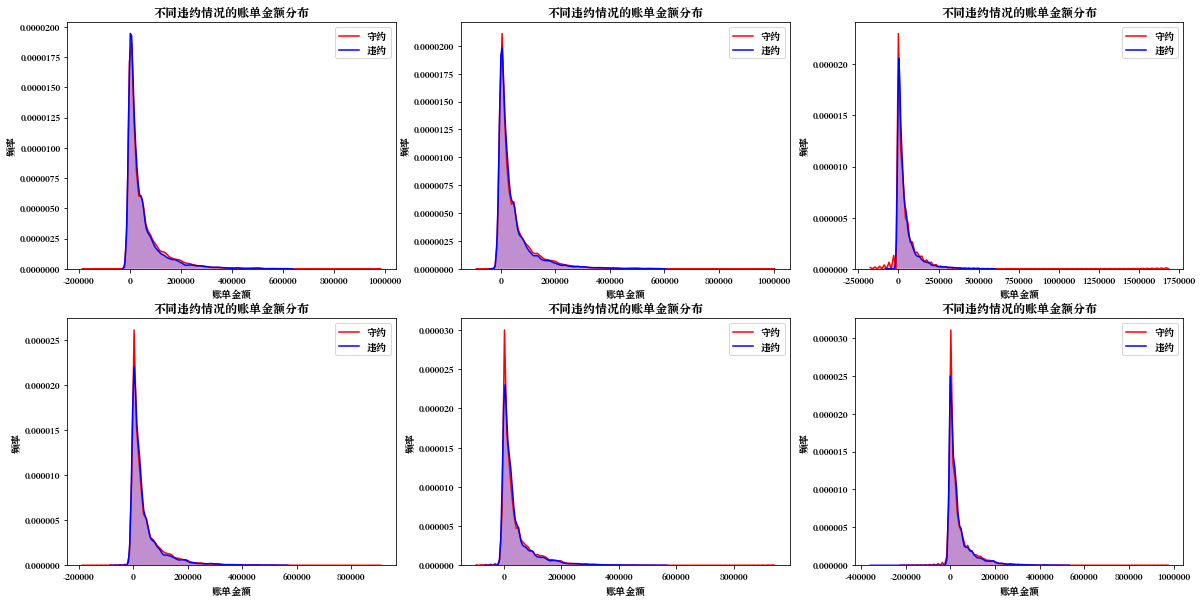

In [16]:
fig,ax  = plt.subplots(2,3,figsize = (20,10))
for i,BILL in enumerate(['BILL_AMT1','BILL_AMT2','BILL_AMT3']):
    sns.distplot(data.loc[data['default.payment.next.month'] == 0,BILL],hist = False,color = 'r',kde_kws={"shade": True,"label":"守约"},ax =ax[0][i])
    sns.distplot(data.loc[data['default.payment.next.month'] == 1,BILL],hist = False,color = 'b',kde_kws={"shade": True,"label": "违约"},ax =ax[0][i])
    ax[0][i].set_title('不同违约情况的账单金额分布')
    ax[0][i].set_xlabel('账单金额')
    ax[0][i].set_ylabel('频率')
for i,BILL in enumerate(['BILL_AMT4','BILL_AMT5','BILL_AMT6']):
    sns.distplot(data.loc[data['default.payment.next.month'] == 0,BILL],hist = False,color = 'r',kde_kws = {'shade':True,"label":"守约"},ax =ax[1][i])
    sns.distplot(data.loc[data['default.payment.next.month'] == 1,BILL],hist = False,color = 'b',kde_kws={"shade": True,"label": "违约"},ax =ax[1][i])
    ax[1][i].set_title('不同违约情况的账单金额分布')
    ax[1][i].set_xlabel('账单金额')
    ax[1][i].set_ylabel('频率')

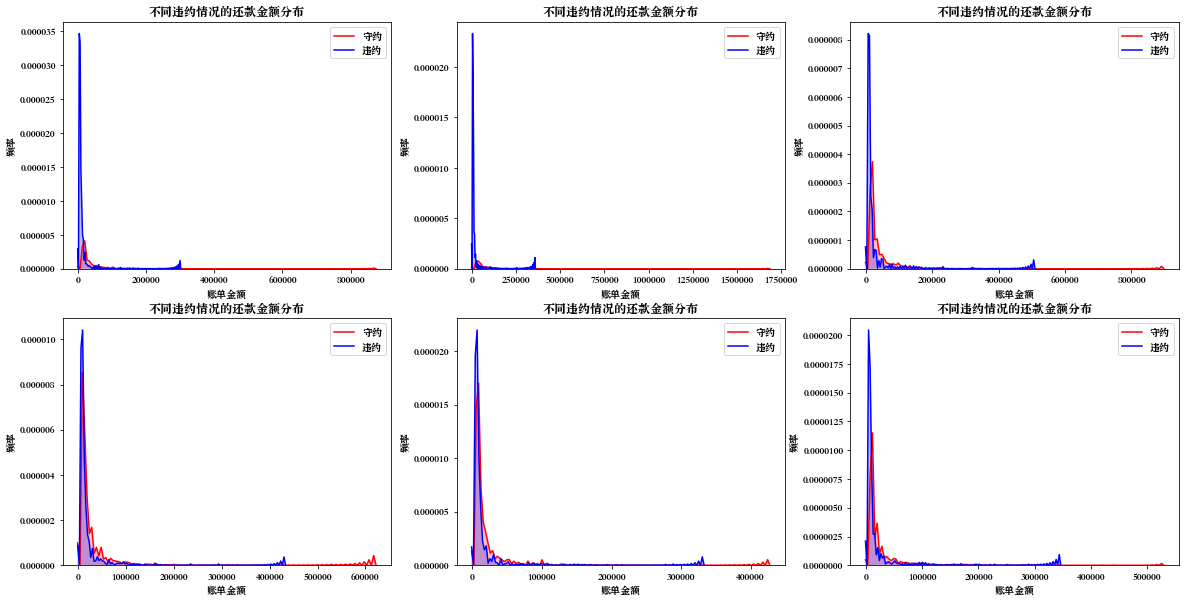

In [17]:
fig,ax  = plt.subplots(2,3,figsize = (20,10))
for i,PAY in enumerate(['PAY_AMT1','PAY_AMT2','PAY_AMT3']):
    sns.distplot(data.loc[data['default.payment.next.month'] == 0,PAY],hist = False,color = 'r',kde_kws={"shade": True,"label":"守约"},ax =ax[0][i])
    sns.distplot(data.loc[data['default.payment.next.month'] == 1,PAY],hist = False,color = 'b',kde_kws={"shade": True,"label": "违约"},ax =ax[0][i])
    ax[0][i].set_title('不同违约情况的还款金额分布')
    ax[0][i].set_xlabel('账单金额')
    ax[0][i].set_ylabel('频率')
for i,PAY in enumerate(['PAY_AMT4','PAY_AMT5','PAY_AMT6']):
    sns.distplot(data.loc[data['default.payment.next.month'] == 0,PAY],hist = False,color = 'r',kde_kws = {'shade':True,"label":"守约"},ax =ax[1][i])
    sns.distplot(data.loc[data['default.payment.next.month'] == 1,PAY],hist = False,color = 'b',kde_kws={"shade": True,"label": "违约"},ax =ax[1][i])
    ax[1][i].set_title('不同违约情况的还款金额分布')
    ax[1][i].set_xlabel('账单金额')
    ax[1][i].set_ylabel('频率')

In [18]:
index = np.random.randint(0,30000,100)
sample_data = data.loc[index,['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','default.payment.next.month']]
sample_data.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
11365,32543.0,13587.0,7850.0,0.0,9205.0,0.0,0
7368,1500.0,800.0,700.0,800.0,800.0,800.0,1
29188,350.0,292.0,12677.0,1650.0,1516.0,12017.0,0
4269,2006.0,1500.0,3000.0,3000.0,9000.0,2000.0,1
1557,316.0,10131.0,2456.0,316.0,316.0,316.0,0


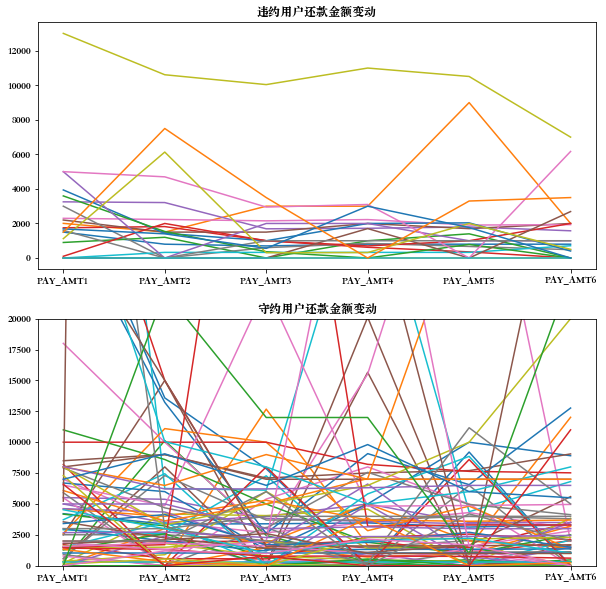

In [19]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (10,10))
for i in sample_data.iterrows():
    dd = pd.DataFrame(i[1])
    if dd.loc['default.payment.next.month',:].values == 1:
        dd.drop('default.payment.next.month',axis = 0,inplace = True)
        ax1.plot(dd.index, dd.values);
    else:
        dd.drop('default.payment.next.month',axis = 0,inplace = True)
        ax2.plot(dd.index, dd.values);
ax1.set_title('违约用户还款金额变动')
ax2.set_title('守约用户还款金额变动')
plt.ylim(0,20000);

不同的受教育程度、性别、婚姻状况、账单金额在是否守约方面未见明显区分，不同年龄、还款金额以及每月还款金额变动在是否守约方面区分明显。


In [20]:
data['default.payment.next.month'] = data.loc[:,'default.payment.next.month'].astype('int')

In [21]:
data[['default.payment.next.month','SEX']].groupby(['SEX'],as_index = False).mean()

,SEX,default.payment.next.month
0,1,0.241672
1,2,0.207763


女性用户违约率比男性用户低约16%,差异显著。

In [22]:
data[['default.payment.next.month','MARRIAGE']].groupby(['MARRIAGE'],as_index = False).mean()

,MARRIAGE,default.payment.next.month
0,0,0.092593
1,1,0.234717
2,2,0.209283
3,3,0.260062


MARRIAGE 字段为 0 无对应释义，需删除。单身用户的违约率比已婚和其它用户低约10%～20%。差异显著。

In [23]:
data[['default.payment.next.month','EDUCATION']].groupby(['EDUCATION'],as_index = False).mean()

,EDUCATION,default.payment.next.month
0,0,0.000000
1,1,0.192348
2,2,0.237349
3,3,0.251576
4,4,0.056911
5,5,0.064286
6,6,0.156863


EDUCATION 字段 0，5，6 无对应释义。可能需要删除。其它学历的用户违约率低，研究生 - 本科生 - 高中生 违约率随着学历的降低而升高。

In [24]:
data[(data['EDUCATION']==0)|(data['EDUCATION']==5)|(data['EDUCATION']==6)]['ID'].count()

345

EDUCATION 字段无对应释义样本数为345，占总样本比率约1%。删除。

In [25]:
data.drop(data[(data['EDUCATION']==0)|(data['EDUCATION']==5)|(data['EDUCATION']==6)].index,axis = 0,inplace = True)

In [26]:
data[(data['EDUCATION']==0)|(data['EDUCATION']==5)|(data['EDUCATION']==6)]['ID'].count()

0

In [27]:
data.drop(data[data['MARRIAGE']==0].index,axis = 0,inplace = True)

选择 LIMIT_BAL,EDUCTAION,MARRIAGE,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
进行数据建模

In [28]:
model_data = data.drop(columns = ['ID','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'])

In [29]:
model_data.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [30]:
columns = model_data.columns.tolist()
columns.remove('default.payment.next.month')
results_var = 'default.payment.next.month'
x = model_data[columns].values
y = model_data[results_var].values

In [31]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state = 1)

classifiers = [
    SVC(random_state = 1,kernel = 'rbf'),
    DecisionTreeClassifier(random_state = 1,criterion = 'gini'),
    RandomForestClassifier(random_state = 1,criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski')
]

classifier_names = [
    'svc', 
            'decisiontreeclassifier',
            'randomforestclassifier',
            'kneighborsclassifier',
]

classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = score)
    # 寻找最优的参数 和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch最优参数：", search.best_params_)
    print("GridSearch最优分数： %0.4lf" %search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print("准确率 %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')

GridSearch最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearch最优分数： 0.8102
准确率 0.8160
GridSearch最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearch最优分数： 0.8112
准确率 0.8227
GridSearch最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearch最优分数： 0.7951
准确率 0.8018
GridSearch最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearch最优分数： 0.8029
准确率 0.8089


> 建模代码参考👉https://github.com/cystanford/credit_default/blob/master/credit_default_analysis.py